<a href="https://colab.research.google.com/github/AnkeethaJha-99/DS_projects/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("/content/customer_churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


A) Data Manipulation

a. Extract the 5th column & store it in ‘customer_5

---



b. Extract the 15th column & store it in ‘customer_15’

---


c. Extract all the male senior citizens whose Payment Method is Electronic check &
store the result in ‘senior_male_electronic’

---


d. Extract all those customers whose tenure is greater than 70 months or their
Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

---


e. Extract all the customers whose Contract is of two years, payment method is Mailed
check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

---


f. Extract 333 random records from the customer_churndataframe& store the result in
‘customer_333’

---


g. Get the count of different levels from the ‘Churn’ column

---



---






In [9]:
customer_5 = data[4:5]
customer_5

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [10]:
customer_15 = data[14:15]
customer_15

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No


In [12]:
#all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

senior_male_electronic = data[(data['gender']=='Male') & (data['SeniorCitizen']==1) & (data['PaymentMethod']=='Electronic check')]
senior_male_electronic


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [13]:
#all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’
customer_total_tenure = data[(data['tenure']>70) | (data['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [15]:
#all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
two_mail_yes = data[(data['Contract']==2) & (data['PaymentMethod']=='Mailed check') & (data['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [22]:

#Extract 333 random records from the customer_churndataframe& store the result in‘customer_333’
random_333 = np.random.randint(low=0,high=7042,size=333)
customer_333 = data.filter(items=random_333, axis=0)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4363,5018-GWURO,Female,0,Yes,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),85.60,4902.8,No
1679,0999-QXNSA,Male,1,No,Yes,7,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,45.75,344.2,No
4605,3796-ENZGF,Male,0,Yes,No,63,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Two year,No,Mailed check,67.25,4234.15,No
981,1106-HRLKZ,Male,0,Yes,Yes,40,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,808.95,No
4279,8815-LMFLX,Male,0,Yes,Yes,25,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.40,546.85,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,7061-OVMIM,Female,0,Yes,Yes,30,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.55,608.5,No
6422,8668-KNZTI,Male,0,No,No,52,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Electronic check,53.75,2790.65,No
1251,7595-EUIVN,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.80,75.8,Yes
5071,1746-TGTWV,Male,0,Yes,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Credit card (automatic),75.35,75.35,No


In [23]:
#count of different levels from the ‘Churn’ column
data['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

B) Data Visualization:
---

---



---


a. Build a bar-plot for the ’InternetService’ column:

---


i. Set x-axis label to ‘Categories of Internet Service’

---


ii. Set y-axis label to ‘Count of Categories’

---


iii. Set the title of plot to be ‘Distribution of Internet Service’

---


iv. Set the color of the bars to be ‘orange’

---


b. Build a histogram for the ‘tenure’ column:
---
i. Set the number of bins to be 30
---
ii. Set the color of the bins to be ‘green’
---
iii. Assign the title ‘Distribution of tenure
---


---


c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
the y-axis & ‘tenure’ to the ‘x-axis’:

---


i. Assign the points a color of ‘brown’
---
ii. Set the x-axis label to ‘Tenure of customer’
---
iii. Set the y-axis label to ‘Monthly Charges of customer’
---
iv. Set the title to ‘Tenure vs Monthly Charges’
---


---


d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
‘Contract’ on the x-axis.

---



---



In [28]:
data['InternetService'].unique()
#CONVERTING OBJECT TO INT

data['InternetService'] = data['InternetService'].map({
    'DSL':1,
    'Fiber optic':2,
    'No':0
})

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
internet_data = pd.DataFrame(data['InternetService'].value_counts())
internet_data

,InternetService
2,3096
1,2421
0,1526


Text(0.5, 1.0, 'Distribution of Internet Service')

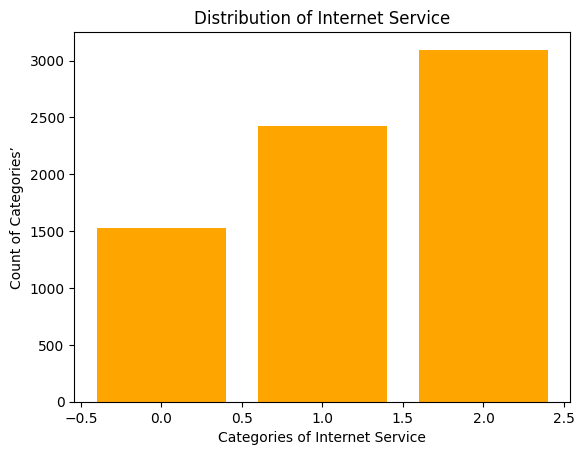

In [54]:
# bar-plot for the ’InternetService’ column
plt.bar(internet_data.index,internet_data.InternetService,color=['orange'],label=['Fiber optic','DSL','No'])
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories’')
plt.title('Distribution of Internet Service')



Text(0.5, 1.0, 'Distribution of tenure')

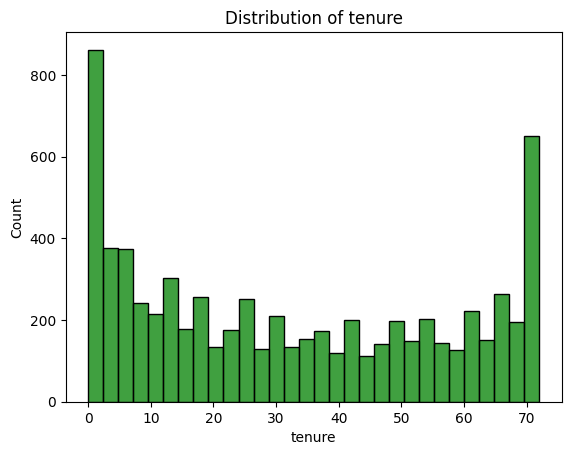

In [56]:
#Build a histogram for the ‘tenure’ column
sns.histplot(data=data,x='tenure',bins=30,color='green')
plt.title('Distribution of tenure')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

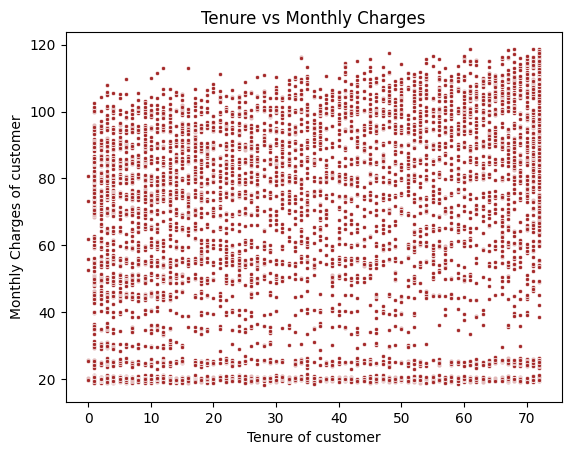

In [60]:
#scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’
sns.scatterplot(x='tenure',y='MonthlyCharges',data=data,color='brown',marker='.')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

<Axes: xlabel='Contract', ylabel='tenure'>

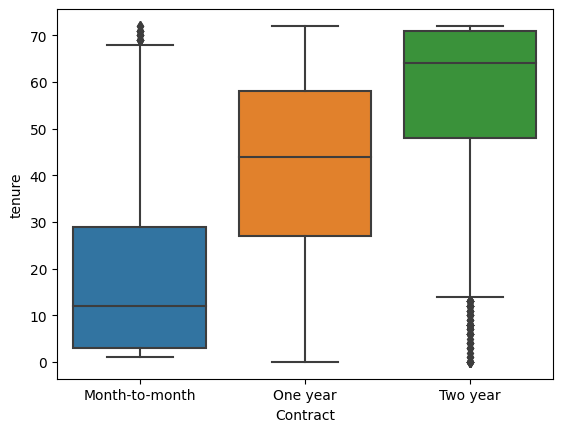

In [61]:
#a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.
sns.boxplot(data=data,x='Contract',y='tenure')

C) Linear Regression:
---

---


a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and
independent variable is ‘tenure’

---


i. Divide the dataset into train and test sets in 70:30 ratio.

---


ii. Build the model on train set and predict the values on test set

---


iii. After predicting the values, find the root mean square error

---


iv. Find out the error in prediction & store the result in ‘error’

---


v. Find the root mean square error

In [63]:
linearreg_data = pd.DataFrame(data[['MonthlyCharges','tenure']])
linearreg_data.head()

,MonthlyCharges,tenure
0,29.85,1
1,56.95,34
2,53.85,2
3,42.30,45
4,70.70,2


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [65]:
X = linearreg_data['tenure']
y= linearreg_data['MonthlyCharges']

In [66]:
#Divide the data between train and test
x_train,x_test,x_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
x_train=np.array(x_train).reshape(-1,1)

In [75]:
y_train=np.array(y_train).reshape(-1,1)

In [76]:
#Build the model
reg_model = LinearRegression().fit(x_train,x_train)

In [80]:
x_test=np.array(x_test).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [79]:
#predict the test data
y_pred = reg_model.predict(x_test)

In [82]:
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
rmse

46.95524078068773

In [85]:
error = pd.DataFrame(y_pred,columns=['y_pred'])
error['y_actual'] = y_test
error['Error'] = error['y_actual']- error['y_pred']
error.head()

,y_pred,y_actual,Error
0,1.0,24.80,23.80
1,41.0,25.25,-15.75
2,52.0,19.35,-32.65
3,1.0,76.35,75.35
4,67.0,50.55,-16.45


D) Logistic Regression:
---

---


a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ &
independent variable is ‘MonthlyCharges’

---


i. Divide the dataset in 65:35 ratio

---


ii. Build the model on train set and predict the values on test set

---


iii. Build the confusion matrix and get the accuracy score

---


b. Build a multiple logistic regression model where dependent variable is ‘Churn’ &
independent variables are ‘tenure’ & ‘MonthlyCharges’

---


i. Divide the dataset in 80:20 ratio

---


ii. Build the model on train set and predict the values on test set

---


iii. Build the confusion matrix and get the accuracy score

---



---



In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [94]:
#simple logistic regression modelwhere dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’
log_reg_data = pd.DataFrame(data[['MonthlyCharges','Churn']])
X= log_reg_data['MonthlyCharges']
y= log_reg_data['Churn']

In [105]:
#split the data 65:35
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [106]:
x_train=np.array(x_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)


In [117]:
#build the model
simple_log_model = LogisticRegression(class_weight='balanced').fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
#predict test data
y_pred=simple_log_model.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [119]:
#getthe accuracy and confusion matrix
def draw_cm(actual,predicted):
  cm= confusion_matrix(actual,predicted)
  sns.heatmap(cm,annot=True,xticklabels=['Churn','Not Churn'],yticklabels=['Churn','Not Churn'])

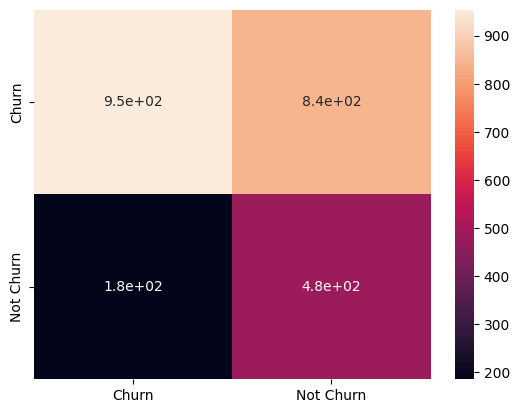

In [120]:
draw_cm(y_test,y_pred)

In [121]:
accuracy_score(y_pred,y_test)

0.5831305758313058

In [125]:
#multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’
mul_log_reg_data = pd.DataFrame(data[['MonthlyCharges','tenure','Churn']])
X= mul_log_reg_data[['MonthlyCharges','tenure']]
y= mul_log_reg_data['Churn']

In [129]:
#split the data 65:35
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)


In [130]:
x_train

,MonthlyCharges,tenure
3143,72.80,13
192,19.75,69
6251,19.25,1
1126,74.65,7
2689,116.75,72
...,...,...
3772,95.00,1
5191,91.10,23
5226,21.15,12
5390,99.45,12


In [131]:
#build the model
mul_log_model = LogisticRegression(class_weight='balanced').fit(x_train,y_train)

In [132]:
#predic the test data
y_pred = mul_log_model.predict(x_test)

In [134]:
confusion_matrix(y_test,y_pred)

array([[1302,  495],
       [ 163,  506]])

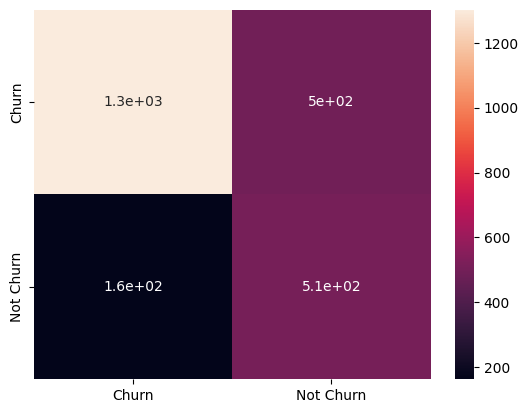

In [133]:
#confusion matrix and accuracy
draw_cm(y_test,y_pred)

In [135]:
print("Accuracy of multiple logistic regression model is - "+ str(accuracy_score(y_pred,y_test)))

Accuracy of multiple logistic regression model is - 0.7331711273317113


E) Decision Tree:
---

---


a. Build a decision tree model where dependent variable is ‘Churn’ & independent
variable is ‘tenure’

---


i. Divide the dataset in 80:20 ratio

---


ii. Build the model on train set and predict the values on test set

---


iii. Build the confusion matrix and calculate the accuracy

---



---



In [137]:
from sklearn.tree import DecisionTreeClassifier

Acccuracy of decision tree model - 0.7004968062455642


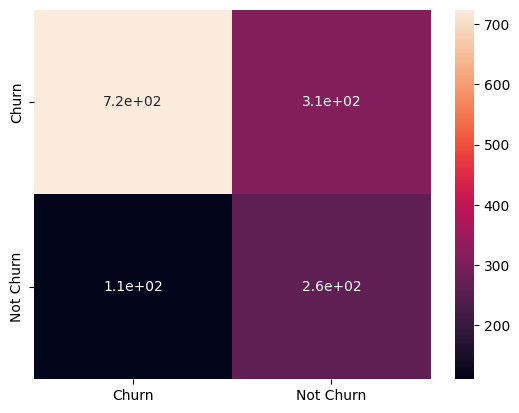

In [139]:
 #decision tree model where dependent variable is ‘Churn’ & independent variable is ‘tenure’
decision_tree_data = pd.DataFrame(data[['tenure','Churn']])
X= decision_tree_data['tenure']
y= decision_tree_data['Churn']

#split the data 80:20
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
x_train=np.array(x_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

#fit the model
decision_tree_model = DecisionTreeClassifier(class_weight='balanced').fit(x_train,y_train)

#predict the test data
y_pred = decision_tree_model.predict(x_test)

#confusion matrix and metrics
draw_cm(y_test,y_pred)
print("Acccuracy of decision tree model - "+ str(accuracy_score(y_pred,y_test)))


F) Random Forest:
---

---


a. Build a Random Forest model where dependent variable is ‘Churn’ & independent
variables are ‘tenure’ and ‘MonthlyCharges’

---


i. Divide the dataset in 70:30 ratio

---


ii. Build the model on train set and predict the values on test set

---


iii. Build the confusion matrix and calculate the accuracy

---



Acccuracy of decision tree model - 0.7501183151916706


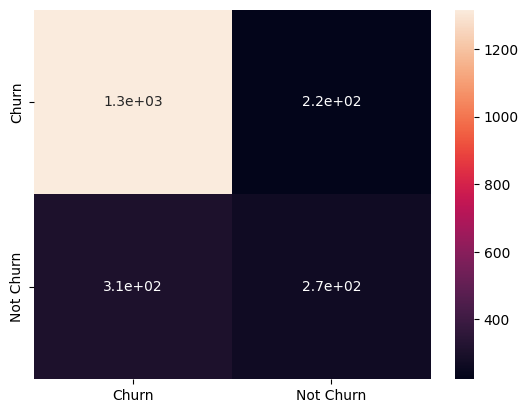

In [142]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’
random_forest_data = pd.DataFrame(data[['MonthlyCharges','tenure','Churn']])
X= random_forest_data[['MonthlyCharges','tenure']]
y= random_forest_data['Churn']

#split the data 70:30
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

#fit the model
random_forest_model = RandomForestClassifier(class_weight='balanced').fit(x_train,y_train)

#predict the test data
y_pred = random_forest_model.predict(x_test)

#confusion matrix and metrics
draw_cm(y_test,y_pred)
print("Acccuracy of decision tree model - "+ str(accuracy_score(y_pred,y_test)))

From the above analysis the RandomForest performs the best.
---